# Introduction


**Types of audio format**

**mp3 -** compressed file and some data is lost

**flac -** less compressed files and data can be reconstructed

**wav - **not compressed but file size is large

**Audio Signal Parameters**

**no of channels -** two types a. mono and b. stero

**sample width -** no of bytes for each sample

**sample_rate/sample_freq -** no of sample for each second

**no of frames**

**values of frame -** it will be in binary form but can be converted into integers

In [49]:
import wave

In [50]:
obj = wave.open('/content/drive/MyDrive/Audio_Dataset/Toronto emotional speech dataset/OAF_Fear/OAF_back_fear.wav','rb')

In [51]:
print("Number of channels:", obj.getnchannels())
print("Sample width:", obj.getsampwidth())
print("Sample rate", obj.getframerate())
print('No of frames', obj.getnframes())
print('Parameters', obj.getparams())

Number of channels: 1
Sample width: 2
Sample rate 24414
No of frames 42166
Parameters _wave_params(nchannels=1, sampwidth=2, framerate=24414, nframes=42166, comptype='NONE', compname='not compressed')


In [52]:
#length of audio can be determined by no of frames/ total per sec
t_audio = (obj.getnframes())/(obj.getframerate())
print('Audio length', t_audio)

Audio length 1.7271237814368805


In [53]:
frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames))

#the sample width is 2 so the frames read will give 2*no of frames
obj.close()

<class 'bytes'> <class 'int'>
84332


In [54]:
#writing/creting copy of a wav file
obj_new = wave.open('angry.wav','wb')
obj_new.setnchannels(1)
obj_new.setsampwidth(2)
obj_new.setframerate(24416)
obj_new.writeframes(frames)
obj_new.close()

# Plotting waveform

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import wave

Reading the required parameters for plotting a wave

the parameters are freq/framerate, total no of frames and all frames

In [56]:
obj = wave.open('/content/drive/MyDrive/Audio_Dataset/Toronto emotional speech dataset/OAF_Fear/OAF_back_fear.wav','rb')
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
obj.close()

In [57]:
t_audio = n_samples/sample_freq
print('Audio length', t_audio)

Audio length 1.7271237814368805


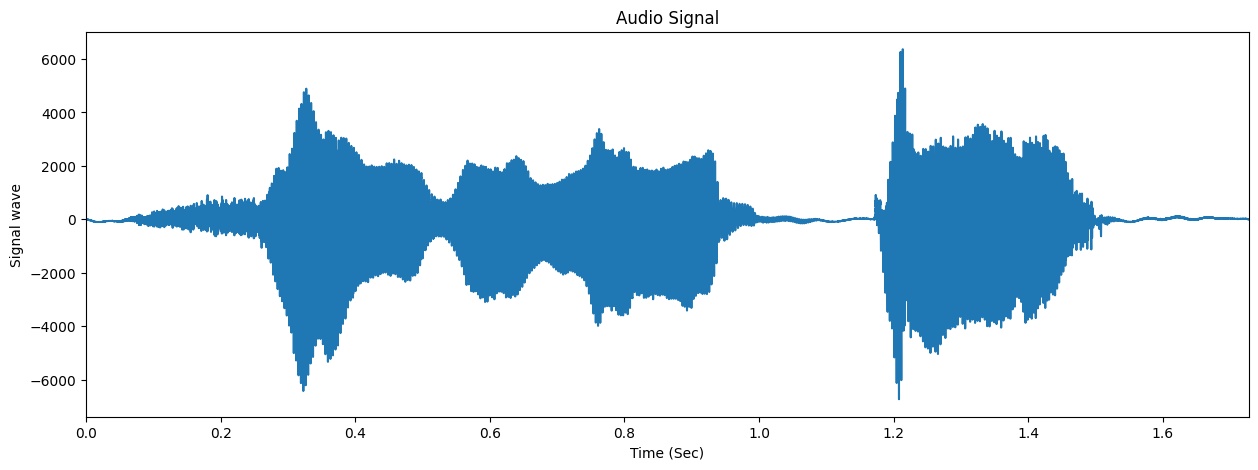

In [58]:
signal_array = np.frombuffer(buffer = signal_wave, dtype = np.int16)  #it takes all frames as buffer and data type
times = np.linspace(start = 0, stop = t_audio, num = n_samples)
plt.figure(figsize=(15,5))
plt.plot(times, signal_array)
plt.title("Audio Signal")
plt.ylabel('Signal wave')
plt.xlabel('Time (Sec)')
plt.xlim(0,t_audio)  #limits the x axis
plt.show()

# Recording audio

In [61]:
!pip install pyaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects


In [59]:
import pyaudio
import wave

ModuleNotFoundError: No module named 'pyaudio'

In [62]:
FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

NameError: name 'pyaudio' is not defined

In [ ]:
p = pyaudio.PyAudio()
stream = p.open(
    format = FORMAT,
    channels= CHANNELS,
    rate = RATE,
    input = True,
    frames_per_buffer = FRAMES_PER_BUFFER
)


In [ ]:
print("Start Recording")

seconds = 5
frames = []

for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
  data = stream.read(FRAMES_PER_BUFFER)
  frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

In [ ]:
#writing/creting copy of a wav file
obj_new = wave.open('custom.wav','wb')
obj_new.setnchannels(CHANNELS)
obj_new.setsampwidth(p.get_sample_size(FORMAT))
obj_new.setframerate(RATE)
obj_new.writeframes(b"".join(frames))  #b"" is a binary list and join(frames) will create a binary string
obj_new.close()